In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv("../Loan_Prediction/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Visualization

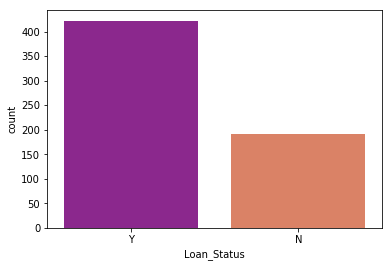

In [3]:
sb.countplot(train.Loan_Status, palette='plasma')
plt.show()

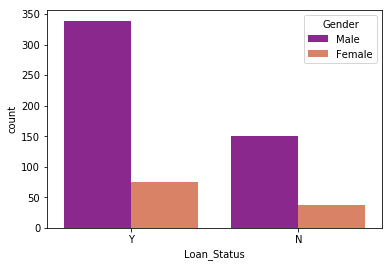

In [4]:
sb.countplot(train.Loan_Status, hue=train.Gender, palette='plasma')
plt.show()

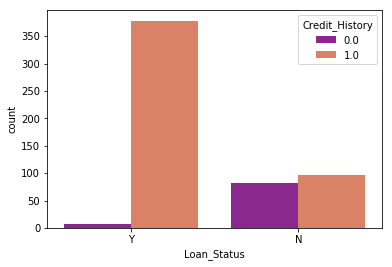

In [5]:
sb.countplot(train.Loan_Status, hue=train.Credit_History, palette='plasma')
plt.show()

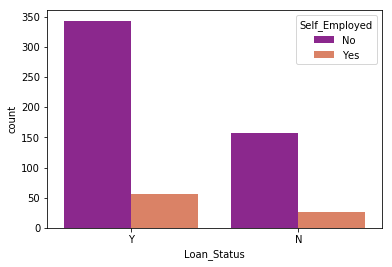

In [6]:
sb.countplot(train.Loan_Status, hue=train.Self_Employed, palette='plasma')
plt.show()

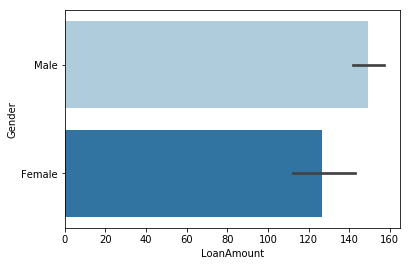

In [7]:
sb.barplot(train.LoanAmount, train.Gender, palette='Paired')
plt.show()

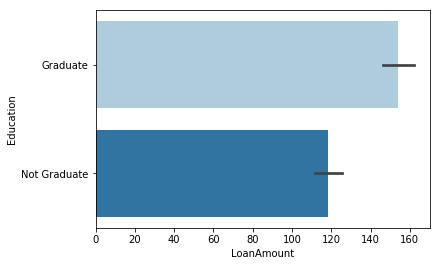

In [8]:
sb.barplot(train.LoanAmount, train.Education, palette='Paired')
plt.show()

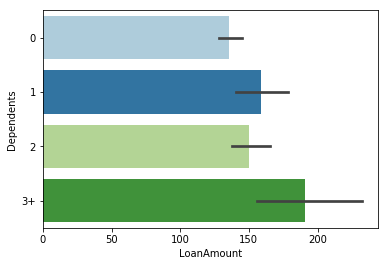

In [9]:
sb.barplot(train.LoanAmount, train.Dependents, palette='Paired')
plt.show()

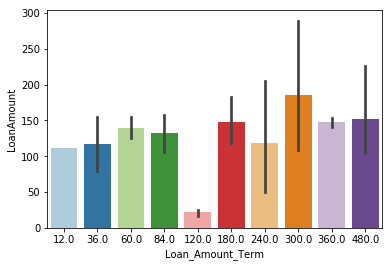

In [10]:
sb.barplot(train.Loan_Amount_Term, train.LoanAmount, palette='Paired')
plt.show()

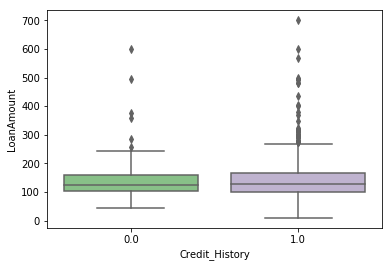

In [11]:
sb.boxplot(train.Credit_History, train.LoanAmount, palette='Accent')
plt.show()

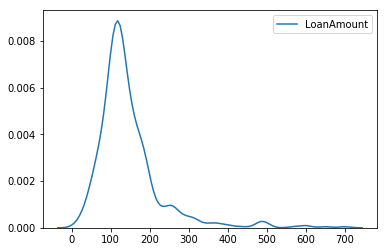

In [12]:
sb.kdeplot(train.LoanAmount)
plt.show()

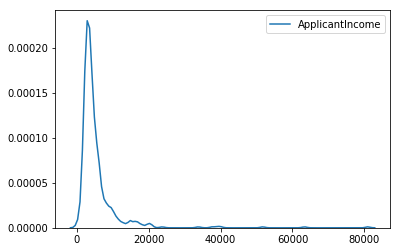

In [13]:
sb.kdeplot(train.ApplicantIncome)
plt.show()

### Check Missing Values

In [14]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Draw Categorical Features

In [16]:
cat_features = []
for i, j in train.dtypes.items():
    if i != 'Loan_ID':
        if j == 'object':
            cat_features.append(i)

In [17]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Check unique values for those Catergorical Features

In [18]:
for i in cat_features:
    print("Column:",i)
    print("Unique Values:")
    print(train[i].unique())
    print("")

Column: Gender
Unique Values:
['Male' 'Female' nan]

Column: Married
Unique Values:
['No' 'Yes' nan]

Column: Dependents
Unique Values:
['0' '1' '2' '3+' nan]

Column: Education
Unique Values:
['Graduate' 'Not Graduate']

Column: Self_Employed
Unique Values:
['No' 'Yes' nan]

Column: Property_Area
Unique Values:
['Urban' 'Rural' 'Semiurban']

Column: Loan_Status
Unique Values:
['Y' 'N']



### Total Number of Rows and Columns

In [19]:
train.shape

(614, 13)

### If we drop all Null Values, too many rows get affected so we won't drop them

In [20]:
train.dropna().shape

(480, 13)

### Statistical Description

In [21]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Value Counts for Gender:

In [22]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### Fill Null Values with Mode value: Male

In [23]:
train.Gender.fillna("Male", inplace = True)

### Value Counts for Married:

In [24]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [25]:
train.groupby(['Gender'])['Married'].value_counts()

Gender  Married
Female  No          80
        Yes         31
Male    Yes        367
        No         133
Name: Married, dtype: int64

In [26]:
for i,j in train['Married'].isnull().items():
    if j == True:
        print(train.loc[i]['Gender'])

Male
Male
Female


### Fill Null Values with Mode value: Yes

In [27]:
train.Married.fillna("Yes", inplace = True)

### Value Counts for Dependents:

In [28]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
train.groupby(['Gender'])['Dependents'].value_counts()

Gender  Dependents
Female  0              80
        1              19
        2               7
        3+              3
Male    0             265
        2              94
        1              83
        3+             48
Name: Dependents, dtype: int64

### Fill Null Values with Mode value: '0'

In [30]:
train.Dependents.fillna('0', inplace = True)

### Value Counts for Self Employed:

In [31]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [32]:
train.groupby(['Gender'])['Self_Employed'].value_counts()

Gender  Self_Employed
Female  No                89
        Yes               15
Male    No               411
        Yes               67
Name: Self_Employed, dtype: int64

In [33]:
train.groupby(['Gender', 'Married'])['Self_Employed'].value_counts()

Gender  Married  Self_Employed
Female  No       No                63
                 Yes               11
        Yes      No                26
                 Yes                4
Male    No       No               108
                 Yes               17
        Yes      No               303
                 Yes               50
Name: Self_Employed, dtype: int64

### Fill Null Values with Mode value: No

In [34]:
train.Self_Employed.fillna("No", inplace = True)

### Value Counts for Loan Amount Term:

In [35]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Fill Null Values with Mode value: 360

In [36]:
train.Loan_Amount_Term.fillna(360.0, inplace = True)

### Missing Values Handling for Loan Amount:

### Null Values for Loan Amount will be replaced by Mean value of Loan Amount according to Loan Amount Term

In [37]:
train.groupby(['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    146.388560
480.0    151.800000
Name: LoanAmount, dtype: float64

In [38]:
laindex = []; lavalues = []

for i in train['Loan_Amount_Term'].unique():
    avg = train[train['Loan_Amount_Term'] == i]['LoanAmount'].mean(skipna = True)
    result = train[train['Loan_Amount_Term'] == i]['LoanAmount'].fillna(avg)
    
    for j in result.index:
        laindex.append(j)
    for j in result.values:
        lavalues.append(j)

In [39]:
result = pd.Series(lavalues, index=laindex)

In [40]:
result.head(20)

0     146.38856
1     128.00000
2      66.00000
3     120.00000
4     141.00000
5     267.00000
6      95.00000
7     158.00000
8     168.00000
9     349.00000
10     70.00000
11    109.00000
12    200.00000
13    114.00000
15    125.00000
17     76.00000
18    133.00000
19    115.00000
20    104.00000
21    315.00000
dtype: float64

In [41]:
result.sort_index(inplace=True)

In [42]:
for i in enumerate(train.columns):
    print(i)

(0, 'Loan_ID')
(1, 'Gender')
(2, 'Married')
(3, 'Dependents')
(4, 'Education')
(5, 'Self_Employed')
(6, 'ApplicantIncome')
(7, 'CoapplicantIncome')
(8, 'LoanAmount')
(9, 'Loan_Amount_Term')
(10, 'Credit_History')
(11, 'Property_Area')
(12, 'Loan_Status')


In [43]:
train.drop('LoanAmount', axis=1, inplace=True)

In [44]:
train.insert(8, 'LoanAmount', result)

In [45]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Value Counts for Credit History:

In [46]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [47]:
train.groupby(['Credit_History'])['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

In [48]:
train.Credit_History.fillna(1.0, inplace=True)

In [49]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Create a New Feature Total Income which is total sum of Applicant and Coapplicant Income and drop these two Applicant Income and Coapplicant Income columns

In [50]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [51]:
train.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

### Create a New Feature Capacity % which depicts how much capable he or she in repaying the Loan Amount

In [52]:
train['Capacity_%'] = ((train['LoanAmount'] / train['Total_Income']) *100).astype(float)

In [53]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity_%
0,LP001002,Male,No,0,Graduate,No,146.38856,360.0,1.0,Urban,Y,5849.0,2.502796
1,LP001003,Male,Yes,1,Graduate,No,128.00000,360.0,1.0,Rural,N,6091.0,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,66.00000,360.0,1.0,Urban,Y,3000.0,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,120.00000,360.0,1.0,Urban,Y,4941.0,2.428658
4,LP001008,Male,No,0,Graduate,No,141.00000,360.0,1.0,Urban,Y,6000.0,2.350000


### Create New Features according to Loan Amount Term: Very Short Term for Less Than 60, Short Term depicts between 60 to 180, Long Term depicts between 180 to 300 and Very Long Term for Greater than 300 Loan Amount Term in Months

In [54]:
train.Loan_Amount_Term.value_counts().sort_index()

12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
Name: Loan_Amount_Term, dtype: int64

In [55]:
train['Very_Short_Term'] = train['Loan_Amount_Term'].map(lambda x: 1 if x <= 60 else 0)

train['Short_Term'] = train['Loan_Amount_Term'].map(lambda x: 1 if x > 60 and x < 180 else 0)

train['Long_Term'] = train['Loan_Amount_Term'].map(lambda x: 1 if x >= 180 and x <= 300  else 0)

train['Very_Long_Term'] = train['Loan_Amount_Term'].map(lambda x: 1 if x > 300 else 0)

### Drop Loan Amount Term Column 

In [56]:
train.drop('Loan_Amount_Term', axis=1, inplace=True)

### Apply Min Max Scalar to Numeric Columns

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scalar = MinMaxScaler()

In [59]:
train['LoanAmount'] = scalar.fit_transform(train['LoanAmount'].values.reshape(-1,1))

In [60]:
train['Total_Income'] = scalar.fit_transform(train['Total_Income'].values.reshape(-1,1))

In [61]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity_%,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,LP001002,Male,No,0,Graduate,No,0.198826,1.0,Urban,Y,0.055394,2.502796,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,0.172214,1.0,Rural,N,0.058435,2.101461,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,0.082489,1.0,Urban,Y,0.019583,2.200000,0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,0.160637,1.0,Urban,Y,0.043980,2.428658,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,0.191027,1.0,Urban,Y,0.057292,2.350000,0,0,0,1


In [62]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity_%,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,LP001002,Male,No,0,Graduate,No,0.198826,1.0,Urban,Y,0.055394,2.502796,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,0.172214,1.0,Rural,N,0.058435,2.101461,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,0.082489,1.0,Urban,Y,0.019583,2.200000,0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,0.160637,1.0,Urban,Y,0.043980,2.428658,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,0.191027,1.0,Urban,Y,0.057292,2.350000,0,0,0,1


### Drop Loan ID Column

In [63]:
train.drop('Loan_ID', axis=1, inplace=True)

In [64]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity_%,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,Male,No,0,Graduate,No,0.198826,1.0,Urban,Y,0.055394,2.502796,0,0,0,1
1,Male,Yes,1,Graduate,No,0.172214,1.0,Rural,N,0.058435,2.101461,0,0,0,1
2,Male,Yes,0,Graduate,Yes,0.082489,1.0,Urban,Y,0.019583,2.200000,0,0,0,1
3,Male,Yes,0,Not Graduate,No,0.160637,1.0,Urban,Y,0.043980,2.428658,0,0,0,1
4,Male,No,0,Graduate,No,0.191027,1.0,Urban,Y,0.057292,2.350000,0,0,0,1


### Map 1 for Y and 0 for N in Loan Status Column

In [65]:
train['Loan_Status'] = train['Loan_Status'].map({"Y": 1, "N": 0})

### Seperate Features and Target

In [66]:
X = train.drop("Loan_Status", axis=1)

In [67]:
y = train['Loan_Status']

### Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
cat_features = X.describe(include=['object'])
cat_features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,614,614,614,614,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,502,401,360,480,532,233


In [70]:
cat_features = cat_features.columns.tolist()

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
label = LabelEncoder()

In [73]:
for i in cat_features:
    X[i] = label.fit_transform(X[i])

In [74]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,Capacity_%,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,0,0,0,0.198826,1.0,2,0.055394,2.502796,0,0,0,1
1,1,1,1,0,0,0.172214,1.0,0,0.058435,2.101461,0,0,0,1
2,1,1,0,0,1,0.082489,1.0,2,0.019583,2.200000,0,0,0,1
3,1,1,0,1,0,0.160637,1.0,2,0.043980,2.428658,0,0,0,1
4,1,0,0,0,0,0.191027,1.0,2,0.057292,2.350000,0,0,0,1


In [75]:
for i in enumerate(X.columns):
    print(i)

(0, 'Gender')
(1, 'Married')
(2, 'Dependents')
(3, 'Education')
(4, 'Self_Employed')
(5, 'LoanAmount')
(6, 'Credit_History')
(7, 'Property_Area')
(8, 'Total_Income')
(9, 'Capacity_%')
(10, 'Very_Short_Term')
(11, 'Short_Term')
(12, 'Long_Term')
(13, 'Very_Long_Term')


### On Hot Encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
ohc = OneHotEncoder(categorical_features=[2,7])

In [78]:
X = ohc.fit_transform(X)

In [79]:
X = X.toarray()

In [80]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

### Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

In [83]:
acc_scores = []; algo = []

### Create a Predictive Model using Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression()

In [86]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_predict = lr.predict(x_test)

### Evaluate the Model 

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy Score:", acc)

Accuracy Score: 0.7886178861788617


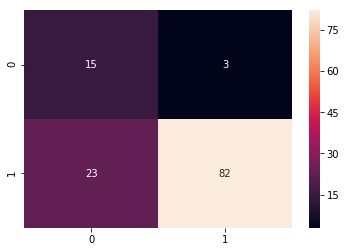

In [90]:
sb.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='d')
plt.show()

In [91]:
acc_scores.append(acc)
algo.append("Logistic Regression")

### Create a Predictive Model using Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt = DecisionTreeClassifier()

In [94]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
y_predict = dt.predict(x_test)

### Evaluate the Model 

In [96]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy Score:", acc)

Accuracy Score: 0.6747967479674797


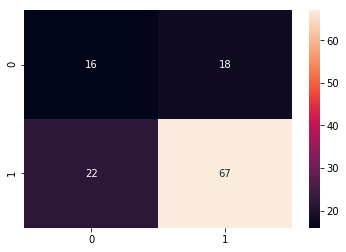

In [97]:
sb.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='d')
plt.show()

In [98]:
acc_scores.append(acc)
algo.append("Decision Tree")

### Create a Predictive Model using Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(n_estimators=100)

In [101]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
y_predict = rf.predict(x_test)

### Evaluate the Model 

In [103]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy Score:", acc)

Accuracy Score: 0.7723577235772358


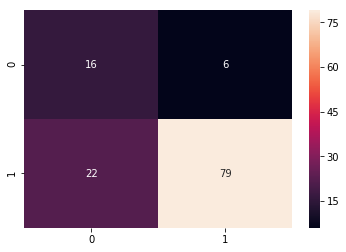

In [104]:
sb.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='d')
plt.show()

In [105]:
acc_scores.append(acc)
algo.append("Random Forest")

### Create a Predictive Model using XGBoost

In [106]:
import xgboost as xg

In [107]:
xgb = xg.XGBClassifier()

In [108]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
y_predict = xgb.predict(x_test)

C:\Users\Ankush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Evaluate the Model 

In [110]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy Score:", acc)

Accuracy Score: 0.8130081300813008


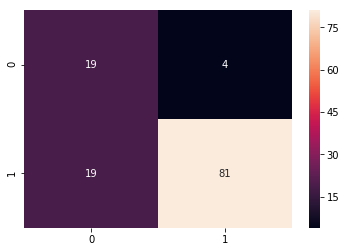

In [111]:
sb.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='d')
plt.show()

In [112]:
acc_scores.append(acc)
algo.append("XGBoost")

### Final Model Report

In [113]:
report = pd.DataFrame({"Algos": algo, "Accuracy Score": acc_scores})
report

,Algos,Accuracy Score
0,Logistic Regression,0.788618
1,Decision Tree,0.674797
2,Random Forest,0.772358
3,XGBoost,0.813008


### We will select XGBoost as a final Model as it gives maximum Accuracy

### Loan Test.csv file and apply same Data Preprocessing for this Dataset as we have applied for previous Train.csv Data 

In [114]:
test = pd.read_csv("../Loan_Prediction/test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Check Missing Values

In [115]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Missing Value Handling for Gender, Dependents, Self_Empolyed, Loan_Amount_Term and Credit_History Features

In [116]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [117]:
test.Gender.fillna("Male", inplace=True)

In [118]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [119]:
test.Dependents.fillna("0", inplace=True)

In [120]:
test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [121]:
test.Self_Employed.fillna('No', inplace=True)

In [122]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [123]:
test.Loan_Amount_Term.fillna(360.0, inplace=True)

In [124]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [125]:
test.Credit_History.fillna(1.0, inplace=True)

### Missing Values Handling for Loan Amount

In [126]:
laindex = []; lavalues = []

for i in test['Loan_Amount_Term'].unique():
    avg = test[test['Loan_Amount_Term'] == i]['LoanAmount'].mean(skipna = True)
    result = test[test['Loan_Amount_Term'] == i]['LoanAmount'].fillna(avg)
    
    for j in result.index:
        laindex.append(j)
    for j in result.values:
        lavalues.append(j)

In [127]:
result = pd.Series(lavalues, index=laindex)

In [128]:
result.sort_index(inplace=True)

In [129]:
for i in enumerate(test.columns):
    print(i)

(0, 'Loan_ID')
(1, 'Gender')
(2, 'Married')
(3, 'Dependents')
(4, 'Education')
(5, 'Self_Employed')
(6, 'ApplicantIncome')
(7, 'CoapplicantIncome')
(8, 'LoanAmount')
(9, 'Loan_Amount_Term')
(10, 'Credit_History')
(11, 'Property_Area')


In [130]:
test.drop('LoanAmount', axis=1, inplace=True)

In [131]:
test.insert(8, 'LoanAmount', result)

In [132]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Create a New Feature Total Income which is total sum of Applicant and Coapplicant Income and drop these two Applicant Income and Coapplicant Income columns

In [133]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [134]:
test.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

### Create a New Feature Capacity % which depicts how much capable he or she in repaying the Loan Amount

In [135]:
test['Capacity_%'] = ((test['LoanAmount'] / test['Total_Income']) *100).astype(float)

### Create New Features according to Loan Amount Term: Very Short Term for Less Than 60, Short Term depicts between 60 to 180, Long Term depicts between 180 to 300 and Very Long Term for Greater than 300 Loan Amount Term in Months

In [136]:
test['Very_Short_Term'] = test['Loan_Amount_Term'].map(lambda x: 1 if x <= 60 else 0)

test['Short_Term'] = test['Loan_Amount_Term'].map(lambda x: 1 if x > 60 and x < 180 else 0)

test['Long_Term'] = test['Loan_Amount_Term'].map(lambda x: 1 if x >= 180 and x <= 300  else 0)

test['Very_Long_Term'] = test['Loan_Amount_Term'].map(lambda x: 1 if x > 300 else 0)

### Drop Loan Amount Term Column 

In [137]:
test.drop('Loan_Amount_Term', axis=1, inplace=True)

### Apply Min Max Scalar to Numeric Columns

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scalar = MinMaxScaler()

In [140]:
test['LoanAmount'] = scalar.fit_transform(test['LoanAmount'].values.reshape(-1,1))

In [141]:
test['Total_Income'] = scalar.fit_transform(test['Total_Income'].values.reshape(-1,1))

### Drop Loan ID Column

In [142]:
test.drop('Loan_ID', axis=1, inplace=True)

### Label Encoding

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
cat_features = test.describe(include=['object'])
cat_features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,367,367,367,367,367
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Urban
freq,297,233,210,283,330,140


In [145]:
cat_features = cat_features.columns.tolist()

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
label = LabelEncoder()

In [148]:
for i in cat_features:
    test[i] = label.fit_transform(test[i])

In [149]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,Capacity_%,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,1,0,0,0,0.157088,1.0,2,0.055957,1.923077,0,0,0,1
1,1,1,1,0,0,0.187739,1.0,2,0.039791,2.753497,0,0,0,1
2,1,1,2,0,0,0.344828,1.0,2,0.071218,3.058824,0,0,0,1
3,1,1,2,0,0,0.137931,1.0,2,0.044172,2.046664,0,0,0,1
4,1,0,0,1,0,0.095785,1.0,2,0.021422,2.380952,0,0,0,1


In [150]:
for i in enumerate(test.columns):
    print(i)

(0, 'Gender')
(1, 'Married')
(2, 'Dependents')
(3, 'Education')
(4, 'Self_Employed')
(5, 'LoanAmount')
(6, 'Credit_History')
(7, 'Property_Area')
(8, 'Total_Income')
(9, 'Capacity_%')
(10, 'Very_Short_Term')
(11, 'Short_Term')
(12, 'Long_Term')
(13, 'Very_Long_Term')


### On Hot Encoding

In [151]:
from sklearn.preprocessing import OneHotEncoder

In [152]:
ohc = OneHotEncoder(categorical_features=[2,7])

In [153]:
test = ohc.fit_transform(test)

In [154]:
test = test.toarray()

In [155]:
test

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

### Make Predictions using XGBoost Model

In [156]:
Y_predict = xgb.predict(test)

C:\Users\Ankush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Collect Loan IDs from Dataset

In [157]:
test_df = pd.read_csv("../Loan_Prediction/test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [158]:
loanids = test_df['Loan_ID'].values

### Create a Report

In [159]:
report = pd.DataFrame({"Loan_ID": loanids, 'Loan_Status': Y_predict})
report.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


### Map 1 as Y and 0 as N for Loan Status

In [160]:
report['Loan_Status'] = report['Loan_Status'].map({1: "Y", 0: "N"})

In [161]:
report.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


### Make a Submission File

In [162]:
report.to_csv("Submission.csv")